```
이전 주에 배운 모델에 대하여,
트랜스포머(Transformer)란?
RNN이나 CNN을 사용하지 않고
오직 어텐션(Attention) 메커니즘을 기반으로 한 구조를 사용하는 모델이야.
```

### BERT : 양쪽을 문맥을 이해
    - 빈칸채우기
    - 감성분석
    - 질문에 대답

####
    - 데이터
    - Hugging Face Transformers Pipline(간단한 api)
    - 토크나이저 (텍스트 -> 토큰 -> 숫자ID)
    - 사전학습된 모델(Bert, GPT-2, DistilBERT 등)
    - 예측 결과(감정분석, 텍스트 생성, 문장 유사도)
    - 후처리 평가(확률 변환, 정확도 계산)

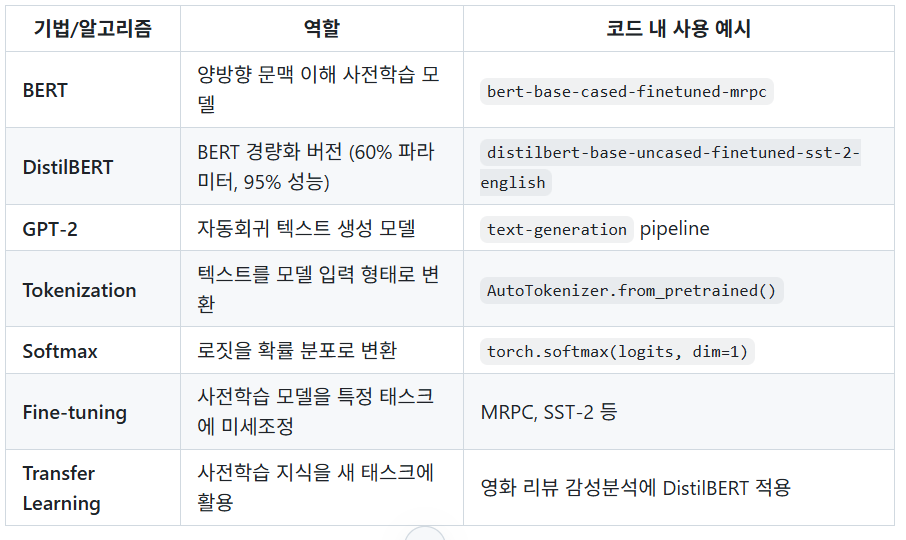

```
트랜스포머: 언어 AI를 만드는 설계도
BERT: 그 설계도로 만든 문장 이해용 AI

트랜스포머 → 기본 구조
BERT → 앞뒤 문장 모두 보고 이해하는 모델
```

🔹 트랜스포머는 원래 번역용 모델
예 ) 한국어 → 영어로 번역

🔹 BERT는 이해용 모델
예 )
문장 속 빈칸 맞추기
감정 분석
질문에 답하기
```

```
트랜스포머 원형은:
인코더 + 디코더 구조
원래는 번역이 목적

BERT는
1)
인코더만 사용
디코더 ❌ (생성 안 함)
인코더만 ⭕ (문장 이해 전문)

2)
BERT의 인코더
완전한 양방향 이해
앞 + 뒤 문맥 모두 보고 이해

예)
"나는 ( )에 간다"

앞에서 보면 → 나는 ( )에
뒤에서 보면 → ( )에 간다
둘 다 보면 "학교" 가능!
```

```
GPT-2는
1)
디코더만 사용
인코더 제거
문장 하나를 받아서 → 다음 단어 생성에 집중
즉, "생성용 트랜스포머"

2)
방향도 한쪽(왼쪽 → 오른쪽)만 사용
이전 단어만 보고 다음 단어 생성
미래 단어는 가려놓음 (Masked Self-Attention)

3)
엄청 큰 데이터로 학습
인터넷 텍스트 대규모 학습
-> 그래서 다양한 주제에 잘 대응
```

LLM(대형 언어 모델)의 시작점은 “번역용 트랜스포머”

```
"I went to the [MASK] to buy some milk"
BERT 예측 : [MASK] = "store" ( 앞뒤 문맥 buy, milk를 보고 추론)
```

사전학습 방법
- MLM(Masked Language Model) : 문장의 15% 단어를 MASK 처리한다음 예측
- NSP(Next Stentece Prediction) : 두 문장이 연결되는지 판단
사전학습(대규모 텍스트)
[CLS] token 추가
특정 태스크 레이블로 학습(감성분석, QA 등)

DistilBERT
- BERT 압축버전 : 속도는 2배 빠르다, 성능은 95% 유지함
- 두꺼운 교과서(BERT)의 핵심만 추린 요약본(DistilBERT)

지식증류(Knowledge Distillation)
- Teacher 모델(BERT) : 소프트레이블 생성(확률분포)
- Student 모델(DistilBERT) : Teacher 출력을 모방

GPT-2
- 이전단어들을 보고 다음 단어를 예측    
- 단방향 Attention:
- Zero-shot Learning : 특정 태스트 학습 없이도 수행 가능
- GPT 시리즈
    - GPT -1 : 117M 파라메터
    - GPT -2 : 1.5B 파라메터
    - GPT -3 : 175B 파라메터(Few-shot Learning)
    - GPT -4 : 멀티모달

### softmax

In [51]:
import numpy as np
def softmax(logits):
    '''
    로짓을 확률 분포로 변환
    Args:
        logits : 모델의 출력 점수([2.5,1.0,0.5])
    returns:
    확률 분포(합이 1인 배열)
    '''
    # 수치 안정성을 위해 최대값을 빼줌(오버플로우 방지)
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / np.sum(exp_logits)
logits = np.array([2.5,1.0,0.5])
probs = softmax(logits)
print(f"logits : {logits}")
print(f"softmax : {probs}")
print(f"softmax sum : {np.sum(probs)}")

logits : [2.5 1.  0.5]
softmax : [0.73612472 0.16425163 0.09962365]
softmax sum : 0.9999999999999999


### WordPiece : word + piece
    - 단어를 자주등장하는 조각(piece) 단위로 잘라서 토큰화
    - 기존 토크나이져 대비 --> 더 잘게 쪼개는 걸로 대처 (Subword)
    - playing --> play + ##ing ## 앞조각에 붙는 서브워드 라는 의미
    - 모르는 단어 : 득템 --> 득 + 템

WordPiece 토큰화 시뮬레이션

In [52]:
# %conda install transformers
# 혹은 터미널에서, conda install transformers 혹은 pip install transformers

# %pip install torch torchdivisioin torchaudio

In [53]:
from transformers import AutoTokenizer
# BERT 토크나이져 로드
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# 테스트 문장 
sentence = 'I love natural lnaguage processing!'

# 토큰화
tokens = tokenizer.tokenize(sentence)
print(tokens)
# 토큰들을 숫자 시퀀스 (정수 ID) 로 변환
token_ids = tokenizer.encode(sentence)
print(token_ids)
# AutoTokenizer에 내장된 단어사전(vocab)을 이용해서 숫자로 인코딩
# 최종적으로 모델에 입력되는 숫자 형태 출력
# 딥러닝 모델은 문자 자체를 이해 못하므로 숫자로 바꾼 것

# 디코딩
decoded = tokenizer.decode(token_ids)
print(f"원본문장 : {sentence}")
print(f"토큰 목록 : {tokens}")
print(f"토큰ID : {token_ids}")
print(f"디코딩 결과 : {decoded}")

print(f"CLS토큰 : {tokenizer.cls_token} -> {tokenizer.cls_token_id}")
print(f"SEP토큰 : {tokenizer.sep_token} -> {tokenizer.sep_token_id}")
print(f"PAD토큰 : {tokenizer.pad_token} -> {tokenizer.pad_token_id}")

['i', 'love', 'natural', 'l', '##na', '##gua', '##ge', 'processing', '!']
[101, 1045, 2293, 3019, 1048, 2532, 19696, 3351, 6364, 999, 102]
원본문장 : I love natural lnaguage processing!
토큰 목록 : ['i', 'love', 'natural', 'l', '##na', '##gua', '##ge', 'processing', '!']
토큰ID : [101, 1045, 2293, 3019, 1048, 2532, 19696, 3351, 6364, 999, 102]
디코딩 결과 : [CLS] i love natural lnaguage processing! [SEP]
CLS토큰 : [CLS] -> 101
SEP토큰 : [SEP] -> 102
PAD토큰 : [PAD] -> 0


```
# CLS:
# 문장 전체 의미를 대표하는 토큰
# (주로 문장 분류(예 : 감성분석, 긍정 / 부정)에 사용)

# SEP: 문장 사이를 구분하는 토큰 (두 문장 입력 시 사용)

# PAD: 길이를 맞추기 위해 빈 곳을 채우는 토큰
```

BERT로 문장 유사도 판단

In [54]:
# AutoTokenizer 지정한 모델 이름에 맞게 토크나이져를 자동으로 불러오는 클래스
# AutoModelForSeqeunceClassification : 문장분류용 BERT 모델을 자동으로 로그
from transformers import AutoTokenizer,AutoModelForSequenceClassification
import torch

# 모델 로드
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased-finetuned-mrpc')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-cased-finetuned-mrpc')
# bert-base-cased-finetuned-mrpc 외에도 다양한 모델이 존재한다.

# 두 문장의 유사도를 측정하는 함수 생성
def check_similarity(sentence1, sentence2):
    '''
    두 문장의 의미적 유사도를 판단
    returns :
        유사확률(0~1사이 값)
    '''
    #1 토큰화
    inputs = tokenizer(sentence1,sentence2,return_tensors='pt')
    #2 모델추론
    with torch.no_grad():
        logits = model(**inputs).logits
    #3 softmax로 확률 반환
        probs = torch.softmax(logits,dim=1)[0]# 0은 배치 매치를 제거
    #4 결과 반환
    return{
        'not_similar' : probs[0].item(),
        'similar' : probs[1].item()
    }
    
# 테스트 케이스
test_cases = [
    ("The cat is on the mat", "A feline is sitting on a rug"),
    ("I love pizza", "Python is a programming language"),
    ("He runs fast", "She walks slowly")
]
for sent1,sent2 in test_cases:
    result = check_similarity(sent1,sent2)
    print(f'문장2 : {sent1}')
    print(f'문장2 : {sent2}')
    print(f'유사확률 {result['similar']:.2f}')

문장2 : The cat is on the mat
문장2 : A feline is sitting on a rug
유사확률 0.90
문장2 : I love pizza
문장2 : Python is a programming language
유사확률 0.04
문장2 : He runs fast
문장2 : She walks slowly
유사확률 0.11


### GPT2


```
GPT-2

다음 단어 후보와 확률
The cat is on the 다음에 단어 후보 와 확률
mat             0.4
roof            0.25
bed             0.15
chair           0.10
floor           0.05

top-k  3  mat roof  bed
top-p  0.8

mat  0.40  -> 누적 0.40
roof 0.25  -> 누적 0.65
bed 0.15   -> 누적 0.80
```

In [55]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
# 모델 로드
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
def generate_text(prompt,max_length=30):
    '''
    프롬프트 기반으로 텍스트 생성
    Args :
        ptompt : 시작 문장
        max_length : 최대 초큰수
    '''
    #1 입력 토큰화
    input_ids = tokenizer.encode(prompt,return_tensors='pt')
    #2 생성(다양한 전략)
    with torch.no_grad(): # 추론(평가)모드
        output = model.generate(
            input_ids,
            max_length = max_length,
            num_return_sequences = 1, # 생성할 문장 갯수
            temperature = 0.8, # 창의성 조절 (높을수록 다양)
            top_k = 50, # 샘플링 전략 상위 k개의 단어만 후보로 사용
            top_p = 0.95, # 누적확률 p 이상 단어만 사용(Nucleus Sampling)
            do_sample = True, # 확률적 샘플링 활성화
            pad_token_id = tokenizer.eos_token_id
            # gpt2는 eos 토큰을 pad토큰으로 사용 ^
        )

    #3 디코딩
    gernerate_txt = tokenizer.decode(output[0],skip_special_tokens=True)
    return gernerate_txt
prompts = [
    "Once upon a time",
    "In the year 2050,",
    "The secret to happiness is"
]
for prompt in prompts:
    result = generate_text(prompt)
    print(f"prompt : {prompt}")
    print(f"생성 : {result}\n")

prompt : Once upon a time
생성 : Once upon a time, the story of the Kree was in doubt. The ancient tribe was struggling with the loss of their homeland, and they had

prompt : In the year 2050,
생성 : In the year 2050, the population of Africa will swell from 15 million to more than 30 million, and by 2050 the total will increase to over 30

prompt : The secret to happiness is
생성 : The secret to happiness is to be happy, and happy is to be happy.

The great idea that the world needs to be the happiest is



###

- BertTokenizer : 직접호출
     - BERT 전용
     - bert-base-uncased, bert-base-cased 등 BERT계열만 지원
     - 다른 모델에서는 사용 불가
     - 모델전화시 코드 수정
- AutoTokenizer : 자동선택
     - BERT RoBERTa, GPT-2, T5 다양한 모델 지원
     - from_pretrained에 모델이름을 넣으면
     - 어떤 클래스가 선택 되었는지 모름 -> 세부구현시 세부옵션 확인


c:\Users\Playdata2\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 288 (\N{LATIN CAPITAL LETTER G WITH DOT ABOVE}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\Playdata2\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 288 (\N{LATIN CAPITAL LETTER G WITH DOT ABOVE}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\Playdata2\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 288 (\N{LATIN CAPITAL LETTER G WITH DOT ABOVE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


토큰화 : ['T', 'He', 'Ġcat', 'Ġsat', 'Ġon', 'Ġthe', 'Ġmat']
Attention : torch.Size([1, 12, 7, 7])


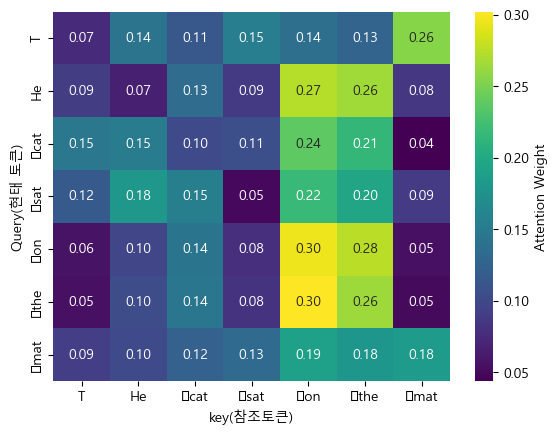

In [56]:
import torch
from transformers import BertTokenizer,BertModel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.family'] = 'Malgun GOthic'
plt.rcParams['axes.unicode_minus'] = False

# 모델 로드
tokeniizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased',output_attentions = True)

# self-Attention 가중치 시각화
sentence = 'THe cat sat on the mat'
#1 토큰화
inputs = tokenizer(sentence,return_tensors='pt')
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
#2 모델생성
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions # 12개 레이어 의 Attention
#3 첫번째 레이어, 첫번째 헤드 Attention 시각화
attention = attentions[0][0,0].numpy()
plt.figure()
sns.heatmap(
    attention,
    xticklabels=tokens,
    yticklabels=tokens,
    cmap='viridis',
    annot=True,
    fmt='.2f',
    cbar_kws={'label':'Attention Weight'}
)
plt.xlabel('key(참조토큰)')
plt.ylabel('Query(현태 토큰)')


print(f'토큰화 : {tokens}')
print(f'Attention : {attentions[0].shape}')

### BERT 모델을 이용해서 영화리뷰 감성분석

In [57]:
# BERT 모델을 이용해서 영화리뷰 감성분석
# 데이터셋 : NLTK movie_reviews
# 모델 DistilBERT
# 평가 : 분류리포트( + , 정확도 혼공행렬)

In [ ]:
# 라이프러리 불러오기
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
# AutoModelForSequenceClassification

In [59]:
# 데이터 불러오기
nltk.download('movie_reviews',quiet=True)

True

In [60]:
reviews = [movie_reviews.raw(id) for id in movie_reviews.fileids()]
categories = [movie_reviews.categories(id)[0] for id in movie_reviews.fileids()]

In [61]:
# 데이터 정수배열 변환
# pos 1 neg 0
y = np.array([1 if ca == 'pos' else 0 for ca in categories])

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(reviews,y,stratify=y,random_state=42)

In [62]:
# 토크나이저, 모델 도구 생성
MODEL_NAME = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

In [63]:
# GPU사용 가능 시 사용설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

In [70]:
# 예측함수 생성
def predict_sentiment(texts, batch_size=0):
    '''
    배치 단위로 감성 예측
    Args :
        texts : 리뷰 텍스트 리스트
        batch_size : 한번에 처리할 샘플 수
    Returns : 
        예측 레이블 변경
    '''
    model.eval()
    predictions = []
    # 배치단위 처리
    num_batchs = (len(texts) + batch_size-1) // batch_size
    # 나머지도 처리할 수있도록 설정하기 위해서 batch_size-1 처리 ^
    with torch.no_grad():
        for i in tqdm(range(num_batchs),desc='예측 중'):
            # 배치 추출
            batch_text = texts[i*batch_size : (i+1)*batch_size]
            # 토큰화(최대 512 토큰, 패딩적용)
            inputs = tokenizer(
                batch_text,
                truncation=True,
                padding=True,
                max_length = 512,
                return_tensors = 'pt'
            )
            inputs = {k : v.to(device) for k, v in inputs.items()}
            # 모델 예측
            outputs = model(**inputs)
            logits = outputs.logits   
            
            # 확률변환
            probs = F.softmax(logits,dim=-1)
            preds = probs.argmax(dim=-1).cpu().numpy()
            predictions.extend(preds)
        return np.array(predictions)

In [71]:
y_pred = predict_sentiment(x_test,batch_size=16)
print(classification_report(y_test,y_pred,target_names=['부정','긍정']))

예측 중: 100%|██████████| 32/32 [02:20<00:00,  4.39s/it]

              precision    recall  f1-score   support

          부정       0.76      0.92      0.83       250
          긍정       0.90      0.70      0.79       250

    accuracy                           0.81       500
   macro avg       0.83      0.81      0.81       500
weighted avg       0.83      0.81      0.81       500



### GPT2로 텍스트 생성 후, BERT MRPC로 유사도 조회

In [ ]:
# AutoTokenizer / AutoModel ... GPT-2 텍스트 생성
# 생성된 문장과 원본문장을 Bert를 이용해서 문장 유사도 계산

In [85]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification,AutoModelForCausalLM
# AutoModelForCausalLM
# AutoModelForCausalLM 시퀀스의 다음단어를 앞 단어기반으로 한단계씩 예측 (자동 회귀 모델) GPT, GPT-Neo.. 등
# AutoModelForSequenceClasssdification 문장 문서분류(Classification) -> 감성분석 스펨 문장 유사도 등.. BERT RoBERT DistilBERT

#1 GPT-2 텍스트 생성
GPT_MODEL_NAME ='gpt2'
gpt_tokenizer = AutoTokenizer.from_pretrained(GPT_MODEL_NAME)
gpt_model = AutoModelForCausalLM.from_pretrained(GPT_MODEL_NAME)

def generate_text(prompt, max_length=30):
    input_ids = gpt_tokenizer(prompt,return_tensors='pt') # 리턴값 텐서로 변환되서 주도록 설정
    input_ids = inputs['input_ids'] # ^
    with torch.no_grad():
        output = gpt_model.generate(
            input_ids,
            max_length = max_length,
            num_return_sequences = 1,
            temperature = 0.8,
            top_k = 50,
            top_p = 0.95,
            do_sample = True,
            pad_token_id = gpt_tokenizer.eos_token_id
        )
    return gpt_tokenizer.decode(output[0],skip_special_tokens=True)

#2 BERT 모델(문장 유사도 MRPC)
BERT_MODEL_NAME = 'bert-base-cased-finetuned-mrpc'
bert_tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL_NAME)
bert_model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME)
def sentence_similarity(sent1,sent2):
    inputs = bert_tokenizer(sent1,sent2,return_tensors='pt')
    with torch.no_grad():
        logits = bert_model(**inputs).logits
        probs = torch.softmax(logits,dim=-1)[0]
    return{
        'not_similar' : probs[0].item(),
        'similar' : probs[1].item()
    }
    
prompts = [
    "Once upon a time",
    "In the year 2050,",
    "The secret to happiness is"
]

for prompt in prompts:
    print(f'프롬포트 : {prompt}')
    print(f'생성 : {generate_text(prompt)}')
    print(f'유사도 : {sentence_similarity(generate_text(prompt),prompt)}')
    print('-'*30)

프롬포트 : Once upon a time
생성 : THe cat sat on the mat, as though to say, "Hey, I got you!"

"I'm sorry, I don't
유사도 : {'not_similar': 0.940188467502594, 'similar': 0.059811562299728394}
------------------------------
프롬포트 : In the year 2050,
생성 : THe cat sat on the mat.

"You're not going to tell her that I didn't have to do it, are you?"
유사도 : {'not_similar': 0.957751989364624, 'similar': 0.042247943580150604}
------------------------------
프롬포트 : The secret to happiness is
생성 : THe cat sat on the mat in the corner of the room. He was alone.

"No, it's not that I'm jealous
유사도 : {'not_similar': 0.9642769694328308, 'similar': 0.0357230044901371}
------------------------------
